In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from skimage.feature import hog

In [3]:
from PIL import Image

In [47]:
df = pd.read_csv("train.csv",header=None)

In [5]:
df.shape

(20000, 1025)

In [48]:
last = len(df.columns)-1

In [58]:
df[last][:4000].value_counts()

9    417
4    416
1    413
6    405
0    405
3    396
2    393
8    392
7    382
5    381
Name: 1024, dtype: int64

In [43]:
trainy  =df[last]

In [44]:
df= df.drop([last],axis=1)

In [45]:
train = df.values

In [46]:
np.unique(trainy)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [130]:
img = train[5,:].reshape((32,32))

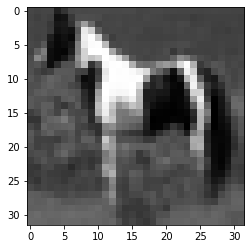

In [122]:
plt.imshow(img,cmap='gray')

In [131]:
fd, hog_image = hog(img, orientations=8, pixels_per_cell=(8,8),
                    cells_per_block=(1, 1), visualize=True)

In [124]:
fd.shape

(128,)

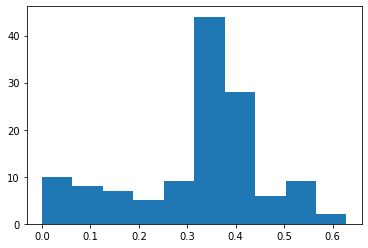

In [125]:
plt.hist(fd)
plt.savefig("hog_hist_bird.png")

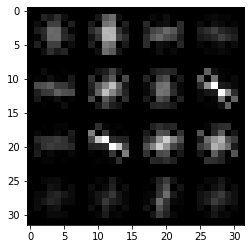

In [132]:
plt.imshow(hog_image,cmap='gray')
plt.savefig("hog_bird.png")

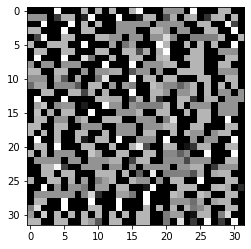

In [84]:
plt.imshow(fd.reshape((32,32)),cmap='gray')

In [60]:
import scipy.fftpack as fp

## Functions to go from image to frequency-image and back
im2freq = lambda data: fp.rfft(fp.rfft(data, axis=0),
                               axis=1)
freq2im = lambda f: fp.irfft(fp.irfft(f, axis=1),
                             axis=0)

## Read in data file and transform
data = img

freq = im2freq(data)
back = freq2im(freq)
# Make sure the forward and backward transforms work!
assert(np.allclose(data, back))

## Helper functions to rescale a frequency-image to [0, 255] and save
remmax = lambda x: x/x.max()
remmin = lambda x: x - np.amin(x, axis=(0,1), keepdims=True)
touint8 = lambda x: (remmax(remmin(x))*(256-1e-4)).astype(int)

In [54]:
a = touint8(freq)

array([[255,  15,  21, ...,  10,  12,  11],
       [ 27,   8,   8, ...,  12,  11,  12],
       [  5,  14,   9, ...,  12,  12,  12],
       ...,
       [ 13,  11,  12, ...,  12,  12,  11],
       [ 11,  12,  11, ...,  11,  11,  12],
       [ 13,  11,  12, ...,  11,  11,  11]])

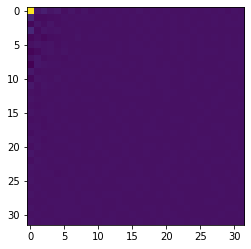

In [56]:
plt.imshow(a)

In [63]:
def fft_image(trainx):
    #shape of trainx = m,n
    ## Functions to go from image to frequency-image and back
    im2freq = lambda data: fp.rfft(fp.rfft(data, axis=0),
                                   axis=1)
    freq2im = lambda f: fp.irfft(fp.irfft(f, axis=1),
                                 axis=0)

    ## Read in data file and transform
    for i in range(trainx.shape[0]):
        curr_img = trainx[i,:].reshape((32,32))
        data = curr_img

        freq = im2freq(data)
        back = freq2im(freq)
        assert(np.allclose(data, back))

        ## Helper functions to rescale a frequency-image to [0, 255] and save
        remmax = lambda x: x/x.max()
        remmin = lambda x: x - np.amin(x, axis=(0,1), keepdims=True)
        touint8 = lambda x: (remmax(remmin(x))*(256-1e-4)).astype(int)
        trainx[i,:] = touint8(freq).reshape((1,1024))
    return trainx

In [65]:
df_x = fft_image(train)

In [67]:
df_x.shape

(19996, 1024)